## ANCHAL SHARMA
# TASK-2

IMPORTING <span style='color:orange'>MODULES</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

IMPORT <span style='color:orange'>DATASET</span>

In [2]:
iris=pd.read_csv('Downloads/Iris.csv')

DATA <span style='color:orange'>UNDERSTANDING</span>

In [8]:
iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
iris.tail(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [10]:
iris.shape

(150, 6)

In [11]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [12]:
iris.Species.nunique()

3

In [13]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.053347,3.758667,1.198667
std,43.445368,0.828066,0.424997,1.764420,0.763161
min,1.000000,4.300000,2.200000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.151000,6.900000,2.500000


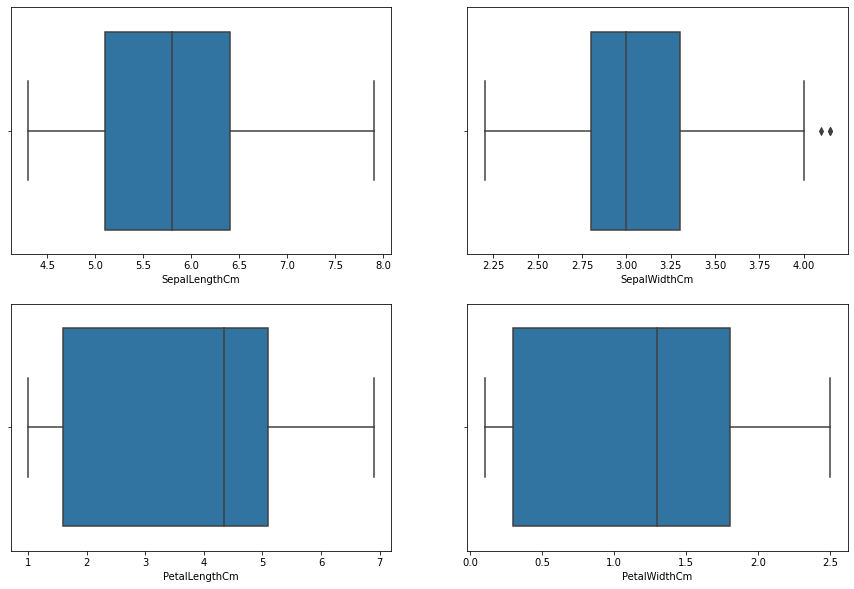

In [14]:
plt.figure(figsize=(15,10))
plt.subplot(221)
sns.boxplot(x='SepalLengthCm',data=iris)
plt.subplot(222)
sns.boxplot(x='SepalWidthCm',data=iris)
plt.subplot(223)
sns.boxplot(x='PetalLengthCm',data=iris)
plt.subplot(224)
sns.boxplot(x='PetalWidthCm',data=iris)


<span style='color:orange'>OUTLIER TREATMENT</span>

In [15]:
q1=iris['SepalWidthCm'].quantile(0.01)
q2=iris['SepalWidthCm'].quantile(0.99)

iris['SepalWidthCm'][iris['SepalWidthCm']<=q1]=q1
iris['SepalWidthCm'][iris['SepalWidthCm']>=q2]=q2

<span style='color:orange'>VISUALIZATION</span>

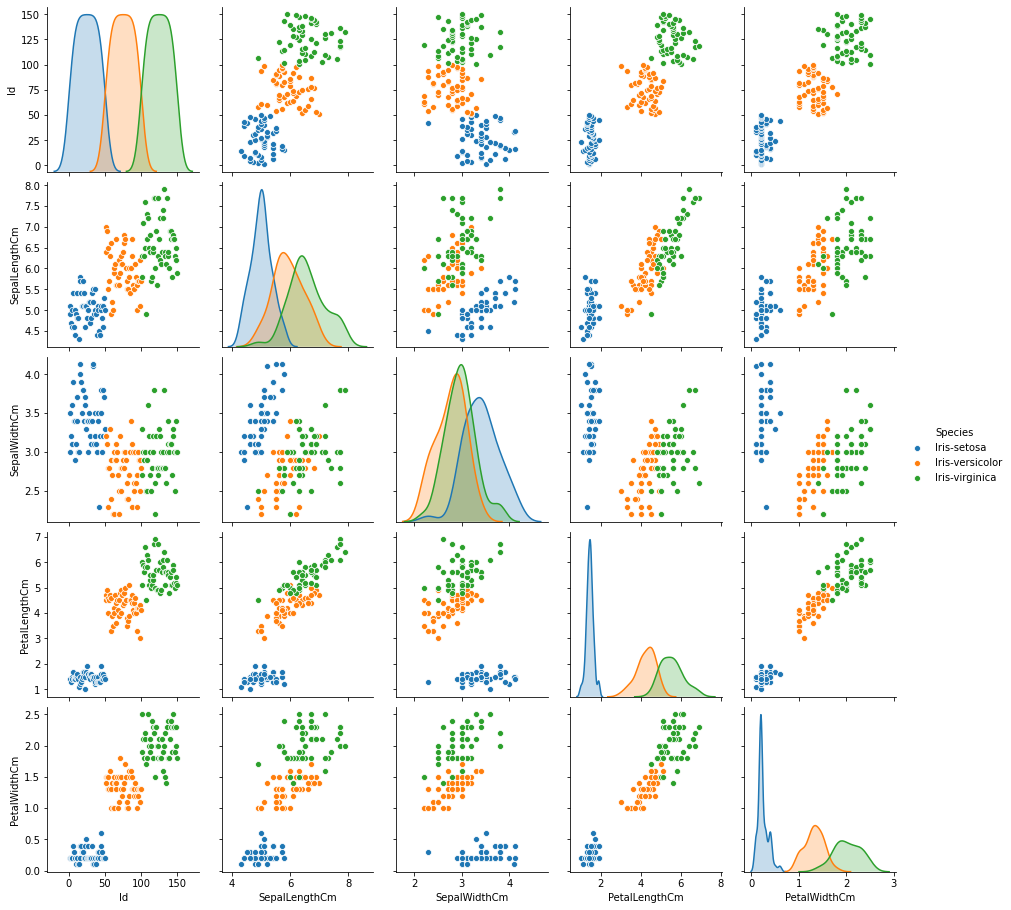

In [16]:
cols=iris.columns[:-1]

sns.pairplot(iris,x_vars=cols,y_vars=cols,hue='Species')


In [17]:
X = iris.iloc[:, [1, 2, 3,4]].values

Text(0, 0.5, 'WCSS')

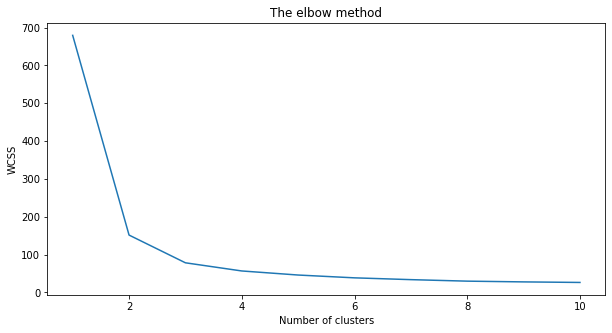

In [18]:
#ELBOW METHOD TO FIND OPTIMUM NUMBER OF CLUSTERS

from sklearn.cluster import KMeans
wcss = [] #Within cluster sum of squares
for i in range(1,11):
    kmeans= KMeans(n_clusters = i, init = 'k-means++',
                  max_iter=300, n_init = 10, random_state=4)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
#PLOTTING

plt.figure(figsize=(10,5))  
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')



In [19]:
#APPLYING K-MEANS TO DATASET
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=4)
Y_km=kmeans.fit_predict(X)

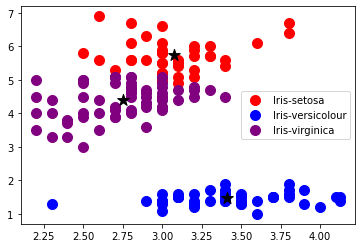

In [20]:
#VISUALISING THE CLUSTERS ON TWO COLUMNS(SepalLengthCm,SepalWidthCm)
plt.scatter(X[Y_km == 0, 1], X[Y_km == 0, 2], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[Y_km == 1, 1], X[Y_km == 1, 2], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[Y_km == 2, 1], X[Y_km == 2, 2],
            s = 100, c = 'purple', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 1],kmeans.cluster_centers_[: ,2],s=150,marker= '*',color='black')

plt.legend()